In [ ]:
# Run this every time you open the spreadsheet
%load_ext autoreload
%autoreload 2
import lib

# Load the data and our rule-based classifier

In [23]:
# Load the data.
# This function returns "tweets" and "test_tweets", both lists of tweets
tweets, test_tweets = lib.read_data()

In [24]:
def classify_rb(tweet):
    
  tweet = str(tweet).lower() # this makes the tweet lower-case, so we don't have to worry about matching case

  if "medicine" in tweet or "first aid" in tweet:
    return "Medical"
  elif "power" in tweet or "battery" in tweet:
    return "Energy"
  elif "water" in tweet or "bottled" in tweet:
    return "Water"
  elif "food" in tweet or "perishable" in tweet or "canned" in tweet:
    return "Food"
  else:
    return "None"

# Python refresher

Let's review some Python concepts before we write our evaluation code.

### Lists
In Python, a _list_ is an ordered collection of items. The items can be strings, numbers, booleans, or any other kind of Python object. 

You can create lists like this:
```
integer_list = [5, 6, 7, 8]
string_list = ['hello', 'world']
bool_list = [False, True, False, False, True]
```

If you want a list of the numbers up to (but not including) 10, you can use the `range` function.
```
upto10_list = range(10)
```
This gives you [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

In [25]:
# Exercise 1(a).
# Create a list called "my_numbers" that contains the numbers from 0 to 6 (inclusive), and then print it

my_numbers = [0,1,2,3,4,5,6]
print(my_numbers)

[0, 1, 2, 3, 4, 5, 6]


In [26]:
# Exercise 1(b).
# Now use the range() function to create "my_numbers", and print the result.
# It should match the previous cell.
# Hint: look carefully at the range(10) example above.

my_numbers = range(7) # 7 = 6+1

# Why the function call to list: to convert the value to a list;
# otherwise it remains "range(7)" due to lazy evaluation
my_numbers = list(my_numbers)

print(my_numbers)


[0, 1, 2, 3, 4, 5, 6]


### For loops

In Python, a _for loop_ allows you to iterate over a list.
```
shopping_list = ['bread', 'bananas', 'milk']

for item in shopping_list:
    print(item)
```

For example, the code above prints out the following output:

```
bread
bananas
milk
```

In [27]:
# Exercise 2. 
# Write a for-loop that iterates through my_numbers, and prints the square of each number
# You should see the following numbers print out, one per line: 0, 1, 4, 9, 16, 25, 36

for x in my_numbers:
    print(x**2)


0
1
4
9
16
25
36


In [28]:
# Exercise 3.
# Use a for-loop to calculate the sum of the squares of my_numbers.
# Save the result in a variable called "sum_squares".
# Hint: start by setting sum_squares to 0 before starting the for-loop.

#### YOUR CODE STARTS HERE ####
# Step 1: initialize a variable to accumulate the sum of squares
sum_squares = 0

for x in my_numbers:
    this_square = x**2
    sum_squares += this_square

#### YOUR CODE ENDS HERE ####

print("Testing: sum_squares = {:d}".format(sum_squares))
print("CORRECT" if sum_squares==91 else "INCORRECT")

Testing: sum_squares = 91
CORRECT


### Incrementing

If you have an integer variable e.g. `x=3` and you want to increase `x` by 1 (which is called _incrementing_), then you can write
```
x = x+1
```
or, in shorthand:
```
x += 1
```

This can be useful when you're using `x` to count something. For example:
```
ages = [7, 14, 23, 3, 10, 19]

num_adults = 0
for age in ages:
    if age >= 18:
        num_adults += 1

print(num_adults)
```
What should this code print out?  
Answer: 2

In [31]:
# Exercise 4.
# Count the number of Weasleys in the list of characters, and save the result to the variable "num_weasleys".
# Use incrementation with the "x += 1" notation.

characters = ['Harry Potter', 'Ron Weasley', 'Albus Dumbledore', 'Ginny Weasley', 'Percy Weasley', 'Hermione Granger', 'Fred Weasley', 'George Weasley']

#### YOUR CODE STARTS HERE ####

num_weasleys = 0

for name in characters:
    if 'Weasley' in name:
        num_weasleys += 1


#### YOUR CODE ENDS HERE ####

print("Testing: num_weasleys = {:d}".format(num_weasleys))
print("CORRECT" if num_weasleys==5 else "INCORRECT")

Testing: num_weasleys = 5
CORRECT


### Testing for equality and inequality

Sometimes you want to check if two values are equal, perhaps using an `if` statement. 
To check for equality you need to use a _double_ equals sign `==`.
```
x = 5 
y = 8
if x == y:
    print("x and y are equal")
```
To check for *inequality*, i.e. if two things aren't equal, use `!=`.
```
x = 5 
y = 8
if x != y:
    print("x and y are NOT equal")
```

In [33]:
# Exercise 5.
# Use a for-loop, incrementation and equality testing to count the number of cats in my list of pets. 
# Assign the result to the variable "num_cats"

my_pets = ['cat', 'lizard', 'cat', 'dog', 'cat', 'snake', 'dog', 'cat', 'dog', 'parrot']


#### YOUR CODE STARTS HERE ####

num_cats = 0

for pet in my_pets:
    # Note: here we use the equality check (i.e. "==")
    # rather than "in" (e.g. if "cat" in pet).
    # Why?
    # Hint: if we use "in", what would happen if I have a pet that's a "catfish"?
    if pet == 'cat':
        num_cats += 1

#### YOUR CODE ENDS HERE ####

print("Testing: num_cats = {:d}".format(num_cats))
print("CORRECT" if num_cats==4 else "INCORRECT")

Testing: num_cats = 4
CORRECT


In [34]:
# Exercise 6.
# Use a for-loop, incrementation and inequality testing to count the number of pets that are neither cats nor dogs.
# Assign the result to the variable "num_unusual".

#### YOUR CODE STARTS HERE ####

num_unusual = 0

for pet in my_pets:
    if pet != "cat" and pet != "dog":
        num_unusual += 1


#### YOUR CODE ENDS HERE ####

print("Testing: num_unusual = {:d}".format(num_unusual))
print("CORRECT" if num_unusual==3 else "INCORRECT")

Testing: num_unusual = 3
CORRECT


# Measure the accuracy of your rule-based classifier

Complete the function below to calculate the Precision, Recall and F1 for a given category (e.g. Food)

In [35]:
def evaluate(predictions, c):
    """This function calculate the precision, recall and F1 for a single category c (e.g. Food)
    Inputs:
        predictions: a list of (tweet, predicted_category) pairs
        c: a category 
    Returns:
        The F1 score.
    """
    
    # Initialize variables to count the number of true positives, false positives and false negatives
    true_positives = 0.0
    false_positives = 0.0
    false_negatives = 0.0
    
    # Iterate through the tweets, counting the number of true positives, false positives and false negatives
    for (tweet, predicted_category) in predictions:
        true_category = tweet.category
        
        # Hint: true positives for category c are tweets that have 
        # true category c and predicted category c
        if true_category == predicted_category: 
            true_positives += 1
            
        # Finish the statement: false negatives for category c are tweets that have 
        # true category ___ and predicted category ___
        elif true_category == c and predicted_category != c:
            false_negatives += 1
        
        # Finish the statement: false positives for category c are tweets that have 
        # true category ___ and predicted category ___
        elif true_category != c and predicted_category == c:
            false_positives += 1
            
            
            
    # Before we calculate Precision, Recall and F1 we need to check whether true_positives = 0. Why?
    if true_positives == 0:
        precision = 0.0
        recall = 0.0
        f1 = 0.0
    else:
        # Calculate Precision, Recall and F1
        # Consult the formulae on the slides
        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1 = 2 * precision * recall / (precision + recall)

    # Print the category name, Precision, Recall and F1
    print(c)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)
    print()

    # Return the F1 score
    return f1


predictions = [(tweet, classify_rb(tweet)) for tweet in test_tweets] # Make a list of (tweet, predicted_category) pairs

# Get the F1 scores for each category
food_f1 = evaluate(predictions, "Food")
water_f1 = evaluate(predictions, "Water")
energy_f1 = evaluate(predictions, "Energy")
medical_f1 = evaluate(predictions, "Medical")
none_f1 = evaluate(predictions, "None")

Food
Precision: 0.8727272727272727
Recall: 0.8930232558139535
F1: 0.8827586206896552

Water
Precision: 0.9458128078817734
Recall: 0.9948186528497409
F1: 0.9696969696969697

Energy
Precision: 0.9504950495049505
Recall: 0.8888888888888888
F1: 0.9186602870813396

Medical
Precision: 1.0
Recall: 0.9696969696969697
F1: 0.9846153846153847

None
Precision: 0.8275862068965517
Recall: 0.8458149779735683
F1: 0.8366013071895424



Complete the cell below to calculate the average F1 score, which should be the average of the F1 scores for each category.

In [36]:
average_f1 = (food_f1 + energy_f1 + medical_f1 + water_f1 + none_f1) / 5
print("Average F1:", average_f1)

Average F1: 0.9184665138545783


## Look at the confusion matrix

* _Rows_ represent the _true category_ of the tweet
* _Columns_ represent the _predicted category_ from your classifier
* So numbers on the diagonal represent correct classifications, and off-diagonal numbers represent misclassification

In [37]:
import numpy as np

categories = ['Energy', 'Food', 'Medical', 'None', 'Water']
# Step 1: assign the number of categories to variable `num_categories`
#### YOUR CODE STARTS HERE ####

num_categories = len(categories)
#### YOUR CODE ENDS HERE ####

# Obtain a list of (tweet, predicted_category) pairs
predictions = [(tweet, classify_rb(tweet)) for tweet in test_tweets]

def get_confusion_matrix(predictions):
    # Step 2: initialize the confusion matrix with zeros
    # We provide 3 ways to initialize the confusion matrix.
    # You can play with any of them.
    method_id = 1
    # method_id = 2
    # method_id = 3
    
    if method_id == 1:
        # Method 1
        confusion_mtrx = []
        for _ in range(num_categories):
            row = []
            for _ in range(num_categories):
                row.append(0)
            confusion_mtrx.append(row)
    elif method_id == 2:
        # Method 2
        confusion_mtrx = []
        for _ in range(num_categories):
            row = [0] * num_categories
            confusion_mtrx.append(row)
    elif method_id == 3:
        # Method 3
        confusion_mtrx = np.zeros(n_rows, n_cols)

    # Step 3: fill in values of the confusion matrix.
    # Remember that the confusion matrix consists of example counts
    # e.g. `confusion_mtrx[0][2] = 4` means
    #      there are 4 examples from class 0 that are predicted as class 2.
    #### YOUR CODE STARTS HERE ####

    # Go through each example in the test set
    for item in predictions:
        # Find the true and predicted label of an example
        tweet = item[0]
        true_category = tweet.category
        predicted_category = item[1]
        
        # Map true/predicted labels to numbers
        # which will be used to index into the confusion matrix
        row = categories.index(true_category)
        column = categories.index(predicted_category)
        
        # Increment the corresponding entry of the confusion matrix
        confusion_mtrx[row][column] += 1
    
    #### YOUR CODE ENDS HERE ####
    return confusion_mtrx

# Step 5: apply your function on the predictions and assign the confusion matrix to variable `confusion_mtrx`
confusion_mtrx = get_confusion_matrix(predictions)

In [38]:
lib.disp_confusion_matrix(confusion_mtrx)
# You can compare your result with (the two results should be identical):
lib.show_confusion_matrix(predictions)

,Energy,Food,Medical,None,Water
Energy,16,4,0,19,1
Food,2,106,0,16,5
Medical,2,0,7,4,0
None,6,24,0,44,5
Water,0,0,0,1,19


,Energy,Food,Medical,None,Water
Energy,16,4,0,19,1
Food,2,106,0,16,5
Medical,2,0,7,4,0
None,6,24,0,44,5
Water,0,0,0,1,19


## Look at the predictions

In [39]:
lib.show_predictions(predictions)

,Text,True category,Predicted category
0,"i have a lot of canned goods and some clothing , but i can also buy and bring things as needed . please let me know what you need most .",Food,Food
1,how the **** am i supposed to get @ meekmill new album when i ai n't got power ? **** outaaa here sandy !,Energy,Energy
2,frankenstorm wo n't stop the bean ! thx for staying open for the neighbors who need coffee and treat ! ( @ the bean ) http : //t.co/zw7oa0tq,Food,None
3,deodorant toothpaste shampoo/conditioner baby shampoo kids toothbrush bar soap mouth wash q-tips painkillers,Medical,None
4,"clothes for baby kids woman men , food , non perishable food , tools , toys , paper , furniture , any products ,",Food,Food
5,"i have blankets , socks , non perishables , baby wipes , diapers",Food,Food
6,"i can bring some clothing , non perishables , hygiene products and some baby supplies",Food,Food
7,oyster creek power plant is on alert for flooding ... . it 's about 80 miles away . great . # sandy,None,Energy
8,nonperishable food hygiene products temporary shelter,Food,Food
9,soo it 's almost 2 am and people are still waiting on that line to get gas.. it 's the shortest line i 've seen though -__- # gas # sandy # nyc,Energy,None


## Bonus: more Python :)

### List Comprehension
*List comprehension* is a shorter (in terms of lines of code) way to construct a list from an *iterable* (for example, a list), which can sometimes be interchangable with constructing using a for-loop.

In [40]:
# The following two outputs are equivalent:
lst = [1,2,3,4,5] # a list
# Method 1: for loop
output1 = []
for each in lst:
    output1.append(each + 5)

# Method 2: list comprehension
output2 = [each+5 for each in lst]

# Check if the two lists are indeed equivalent
if output1 == output2:
    print('Sanity check passed.')
else:
    print('Sanity check failed.')

Sanity check passed.


What if there is an if-statement in the loop? For example:

In [41]:
lst = [1,2,3,4,5]
odd_output = []
for each in lst:
    if each % 2 == 1:
        # only add odd numbers to the output
        odd_output.append(each)
print(odd_output)

[1, 3, 5]


Can we use list comprehension? Yes, by adding a condition:

In [43]:
odd_output = [each for each in lst if each % 2 != 0] # Note the "if each % 2 != 0"
print(odd_output)

[1, 3, 5]


### PyPlot
Python library for ploting.

In [47]:
import matplotlib
# uncomment the following if you get display error:
# matlibplot.use('Agg')
import matplotlib.pyplot as plt

Display the **confusion matrix** you saw in the slides:

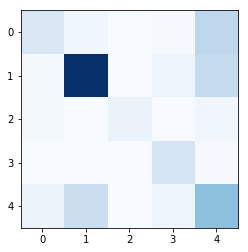

In [49]:
confusion_mtrx = [[16,4,0,1,29], [2,106,0,5,26], [2,0,7,0,4], [0,0,0,19,1], [6,24,0,5,44]]
plt.imshow(confusion_mtrx, cmap=plt.cm.Blues)